# NETFLIX INTERACTIVE DASHBOARD AND RECOMMENDATION SYSTEM


## INTRODUCTION

With more than 209 million paying subscribers in more than 190 countries, Netflix is the most popular streaming entertainment service in the world. Members may access TV shows, documentaries, and feature films in a range of genres and languages. In this research, I will be going through some basic steps to turn a CSV data file into an interactive dashboard on a standalone HTML file, and then I will also build a recommendation system based on the user's inputs.

## 1. PROBLEM DEFINITION

With that being mentioned above, this notebook works on creating a dashboard containing different Netflix charts on the data provided. The dashboard is fully interactive, and we can also create a navigation menu to switch between those different plots. Additionally, we are going to build a basic movie recommendation system, where we can type in a movie name and immediately get 5 recommendations for other movies we might want to watch.

# 2. DATA PREPARATION

### a. Data description

* Data source: Netflix Movies and TV Shows  [Link](https://www.kaggle.com/datasets/shivamb/netflix-shows).
* Data organization: 1 CSV file organized in a long data format.
* Sample size: 8,807 observations.
* Number of features: 12 columns.
* Data duration: 2008-01-01 to 2021-09-25.
* Data credibility: Since the data was collected by a third party, it is difficult to verify the reliability of the dataset.
* Data license: CC0 Public Domain.

### b. Features

There are 12 features in the dataset:
* show_id: unique ID for every movie or TV show
* type: identifier whether a movie or a TV show
* title: title of the movie or TV show
* director: directors of the movie or TV show
* cast: actors/actresses in the movie or TV show
* country: country where the movie or TV show was produced
* date_added: date when it was added on Netflix
* release_year: actual release year of the movie or TV show
* rating: rating of the movie or TV show
* duration: total duration in minutes or in seasons
* listed_in: genres of the movie or TV show
* description: summary description of the movie or TV show

## 3. DATA PROCESSING

Let's load some required packages for data cleaning and import our dataset.

In [1]:
#Regular EDA (exploratory data analysis) and plotting libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt

In [2]:
#Importing Netflix dataset
data = pd.read_csv('netflix_titles.csv')

In [3]:
#Viewing the first 5 rows
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#Viewing dataframe structure
data.shape

(8807, 12)

### a. Checking duplicate values

In [5]:
#Checking the percent of duplicate values in the dataser
print('Percent of duplicate values:', 100*(len(data) - len(data.drop_duplicates()))/len(data), '%')
print('Percent of duplicate values without show_id column:', 
      100*(len(data.drop('show_id', axis=1)) - len(data.drop('show_id',  axis=1).drop_duplicates())) /
              len(data.drop('show_id',  axis=1)), '%')

Percent of duplicate values: 0.0 %
Percent of duplicate values without show_id column: 0.0 %


In [6]:
#Checking if 'show_id' is equal to the dataframe's index plus 1
print('Number of show_id different from the index:', 
      np.sum([int(s.replace('s', '')) for s in data['show_id']] != np.arange(1, len(data['show_id'])+1)))

Number of show_id different from the index: 0


In [7]:
#Dropping 'show_id' because we have index as id column
data.drop(['show_id'], axis=1, inplace=True)

### b. Adjusting datatype

In [8]:
#Checking datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [9]:
#Converting type of date_added column from object to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

### c. Handling missing values

In [10]:
#Counting number of missing values
data.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Empty Data')

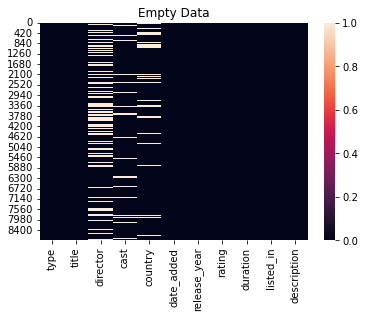

In [11]:
#Plotting null values in our dataset by using heatmap
sns.heatmap(data.isnull())
plt.title("Empty Data")

Columns contains null values:
* director
* cast
* country
* date_added
* rating
* duration

My goal in data cleaning is to keep all 8,807 observations in the dataset. Therefore, instead of removing rows containing missing values, I would rather fill those missing values with appropriate values. Netflix tends to add or update the content over time so I will label null values in 'director', 'cast', 'country', and 'rating' as 'Not yet updated'.

In [12]:
#Filling null values in director, cast, country, and rating by 'Not yet updated'
data.fillna({'director': 'Not yet updated', 'cast': 'Not yet updated', 
             'country': 'Not yet updated', 'rating': 'Not yet updated'}, inplace=True)
data.isnull().sum()

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

For missing values on 'date_added' column, I will replace them with the most current date_added in the dataset.

In [13]:
#Viewing missing values on 'date_added'
data[data.date_added.isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,TV Show,A Young Doctor's Notebook and Other Stories,Not yet updated,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,TV Show,Anthony Bourdain: Parts Unknown,Not yet updated,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,TV Show,Frasier,Not yet updated,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,TV Show,Friends,Not yet updated,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,TV Show,Gunslinger Girl,Not yet updated,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,TV Show,Kikoriki,Not yet updated,Igor Dmitriev,Not yet updated,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,TV Show,La Familia P. Luche,Not yet updated,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,TV Show,Maron,Not yet updated,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,TV Show,Red vs. Blue,Not yet updated,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,TV Show,The Adventures of Figaro Pho,Not yet updated,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [14]:
#Filling missing values in 'date_added' by the most current date_added in the dataset
data.fillna({'date_added': data['date_added'].max()}, inplace=True)

Moving on, we will have a look at the missing value on 'duration'.

In [15]:
#Viewing missing values on 'duration' column
data[data.duration.isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [16]:
#Checking whether there is any overwriting row of director 'Louis C.K.'
data[(data['director']=='Louis C.K.')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [17]:
#Swapping values from 'rating' column to 'duration'
data.loc[data['director']=='Louis C.K.', 'duration'] = data['rating']
data[(data['director']=='Louis C.K.')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [18]:
#Changing the incorrect values on 'rating' to 'Not yet updated'
data.loc[data['director']=='Louis C.K.', 'rating'] = 'Not yet updated'
data[(data['director']=='Louis C.K.')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Not yet updated,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Not yet updated,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Not yet updated,66 min,Movies,The comic puts his trademark hilarious/thought...


#### Result:

In [19]:
#Viewing the first 5 rows
data.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not yet updated,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Not yet updated,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not yet updated,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Not yet updated,Not yet updated,Not yet updated,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Not yet updated,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
#Checking datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 757.0+ KB


In [21]:
#Counting number of missing values
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### d. Counting number of unique values in each column

In [22]:
#Viewing the summary statistics for numerical fields
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [23]:
#Viewing the summary statistics for 'date_added' column
data['date_added'].describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9300\2110400076.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['date_added'].describe()


count                    8807
unique                   1714
top       2020-01-01 00:00:00
freq                      110
first     2008-01-01 00:00:00
last      2021-09-25 00:00:00
Name: date_added, dtype: object

In [24]:
#Viewing the summary statistics for string fields
data.drop(['release_year', 'date_added'], axis=1).describe()

,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,2,8807,4529,7693,749,15,220,514,8775
top,Movie,Dick Johnson Is Dead,Not yet updated,Not yet updated,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,6131,1,2634,825,2818,3207,1793,362,4


In [25]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [26]:
data['title'].value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

In [27]:
data['director'].value_counts()

Not yet updated                   2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

In [28]:
data['cast'].value_counts()

Not yet updated                                                                                                                                                                               825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                              

In [29]:
data['country'].value_counts()

United States                             2818
India                                      972
Not yet updated                            831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [30]:
data['rating'].value_counts()

TV-MA              3207
TV-14              2160
TV-PG               863
R                   799
PG-13               490
TV-Y7               334
TV-Y                307
PG                  287
TV-G                220
NR                   80
G                    41
Not yet updated       7
TV-Y7-FV              6
NC-17                 3
UR                    3
Name: rating, dtype: int64

In [31]:
data['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

## 4. EXPLORATORY DATA ANALYSIS AND INTERACTIVE DASHBOARD

In this section, I will use pyecharts library to transform boring numbers into a beautiful interactive dashboard.

In [32]:
#Python standard library
from pathlib import Path
#Module to create visualizations and dashboard
from pyecharts import options as opts
from pyecharts.charts import Bar, Calendar, Tab

In [33]:
#Plotting Number of TV shows and Movies
type = pd.DataFrame(data['type'].value_counts())
type = (
    Bar()
    .add_xaxis(type.index.tolist())
    .add_yaxis('type', type['type'].tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Number of TV shows and Movies'),
        legend_opts=opts.LegendOpts(is_show=False)
    )
)
type.render_notebook()

Number of movies outweighs the number of TV shows in this period. 

In [34]:
#Plotting top 10 countries producing TV shows and Movies
country = pd.crosstab(data.country, data.type)
country = country.sort_values(by=['Movie'], ascending=False).head(10)

type_by_country = (
    Bar()
    .add_xaxis(country.index.tolist())
    .add_yaxis('Movie', country['Movie'].tolist())
    .add_yaxis('TV Show', country['TV Show'].tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Top 10 countries with the most content')
    )
)
type_by_country.render_notebook()

United States and India are the most dominant movie industries.

In [35]:
#Plotting ratings of TV shows and Movies
rating = pd.crosstab(data.rating, data.type)
rating = rating.sort_values(by=['Movie'], ascending=False).head(10)

type_by_rating = (
    Bar()
    .add_xaxis(rating.index.tolist())
    .add_yaxis('Movie', rating['Movie'].tolist())
    .add_yaxis('TV Show', rating['TV Show'].tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Top 10 ratings of TV shows and Movies')
    )
)
type_by_rating.render_notebook()

The largest count of movies is made with the 'TV-MA' rating. "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. The second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age. 'TV-PG' and 'R' has an approximately equal amount of movies.

In [36]:
#Plotting number of TV shows and Movies from 2002 to 2021
release_year = pd.DataFrame(data['release_year'].value_counts()).head(20)
release_year = release_year.sort_index(axis=0)

release_year = (
    Bar()
    .add_xaxis(release_year.index.tolist())
    .add_yaxis('release_year', release_year['release_year'].tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Number of TV shows and Movies by year', subtitle='from 2002 to 2021'),
        legend_opts=opts.LegendOpts(is_show=False)
    )
)
release_year.render_notebook()

2018 is the year with the most content being released.

In [37]:
#Plotting Top 20 popular genres
genres = pd.DataFrame(data['listed_in'].value_counts()).head(20)
genres = genres.sort_values(by=['listed_in'], ascending=True)

genres = (
    Bar()
    .add_xaxis(genres.index.tolist())
    .add_yaxis('listed_in', genres['listed_in'].tolist())
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position='right'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Top 20 popular genres'),
        legend_opts=opts.LegendOpts(is_show=False)
    )
)
genres.render_notebook()

Dramas, Documentaries, and Stand-up Comedy are top 3 popular genres.

In [38]:
#Plotting 'Number of TV shows and Movies added by date in 2020
shows_added_by_date = data.groupby(by='date_added')['title'].count()
shows_added_by_date = shows_added_by_date.reset_index()
shows_added_by_date = shows_added_by_date[['date_added', 'title']].values.tolist()

shows_added_by_date = (
    Calendar()
    .add('', shows_added_by_date, calendar_opts=opts.CalendarOpts(range_='2020'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Number of TV shows and Movies added by date', subtitle='in 2020'),
        legend_opts=opts.LegendOpts(is_show=False),
        visualmap_opts=opts.VisualMapOpts(
                orient='horizontal',
                is_piecewise=False,
                pos_top='230px',
                pos_left='100px',
        )
    )
)
shows_added_by_date.render_notebook()

Netflix usually uploads new shows and movies in the beginning of every month.

In [39]:
#Creating HTML file to combine all charts
tab = Tab(page_title='Netflix Exploratory Data Analysis')
tab.add(type, 'Number of TV shows and Movies')
tab.add(type_by_country, 'Top 10 countries with the most content')
tab.add(type_by_rating, 'Top 10 ratings of TV shows and Movies')
tab.add(release_year, 'Number of TV shows and Movies by year')
tab.add(genres, 'Top 20 popular genres')
tab.add(shows_added_by_date, 'Number of TV shows and Movies added by date')

tab.render(Path.cwd() / 'Netflix Exploratory Data Analysis.html')

'C:\\Users\\Admin\\MACHINE_LEARNING_FALL2022\\Netflix\\Netflix Exploratory Data Analysis.html'

## 5. RECOMMENDATION SYSTEM

### a. Cleaning title with regular expression

In [40]:
#Importing python regular expression library
import re

#Creating clean_title function
def clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title) 
    #search through all the titles to look for those are not letters, numbers or space and then remove them
    return title

In [41]:
#Creating new column cleaned_title
data["clean_title"] = data["title"].apply(clean_title)

In [42]:
data.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_title
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not yet updated,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead
1,TV Show,Blood & Water,Not yet updated,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood Water
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not yet updated,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Ganglands
3,TV Show,Jailbirds New Orleans,Not yet updated,Not yet updated,Not yet updated,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Jailbirds New Orleans
4,TV Show,Kota Factory,Not yet updated,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Kota Factory


### b. Creating a TFIDF matrix

In [43]:
#Importing package to turn titles to numbers
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
#Initializing the class for title conversion
vectorizer = TfidfVectorizer(ngram_range=(1,2))
#ngram_range=(1,2) looks through groups of 2 words in title to make searching results more accurate

#Fitting titles to the engine 
tfidf = vectorizer.fit_transform(data["clean_title"])

### c. Creating the search function

In [45]:
#Importing package to calculate cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
#Creating search function
def search(title):
    title = clean_title(title) #define input title and clean it
    query_vec = vectorizer.transform([title]) #transform input title to number
    similarity = cosine_similarity(query_vec, tfidf).flatten() #conpare the similarity of input_title with cleaned_title we have
    indices = np.argpartition(similarity > 0, -5)[-5:] #pick only top 5 with highest similarity
    results = data.iloc[indices].iloc[::-1] #reverse the outcomes of top 5
    
    return results

### d. Building an interactive search box

In [47]:
#Importing package to create and display search box
import ipywidgets as widgets
from IPython.display import display

In [48]:
#Creating input widget
movie_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)

#Creating output widget
movie_list = widgets.Output()

#Creating function which would be called whenever we typed something in the input widget
def on_type(data):
    with movie_list:
        movie_list.clear_output() #clear the previous output results
        title = data["new"] #grab the title from the input widget
        if len(title) > 3:
            display(search(title)) #if the input title > 3 display the search(title) funtion results

#Connecting the movie_input widget with on_type funtion
movie_input.observe(on_type, names='value')
#names='value' is just one type of event when we type something in the input widget

#Showing both input and output widgets
display(movie_input, movie_list)

Text(value='Toy Story', description='Movie Title:')

Output()

## CONCLUSION

We came really far in this project. We started by reading in some data, and then cleaned up the data. After that, we built an interactive dashboard using 'pyecharts' library and a search engine that would recommend 5 movies whenever we type in a movie name.

For the next steps, I suggest:
* Updateting the data marked as 'Not yet updated'.
* Collecting users' behavior data like which shows/movies they watch, like, rewatch, etc. After that, we can figure out who liked or watched the same shows/movies and how much all users fancy that show/movie to improve the recommendation system.
* Adding another input box to filter the genre, that we want the recommendations to be in.

## REFERENCES

* Exploratory Data Analysis On Netflix Data. [Link](https://www.youtube.com/watch?v=DyU51nRqcHg)
* Movie Recommendation System With Python And Pandas: Data Project [Link](https://www.youtube.com/watch?v=eyEabQRBMQA)
* Turn Your Excel Data Into An Interactive Dashboard Using Python. [Link](https://www.youtube.com/watch?v=xE95tIzCuKM)